In [1]:
# Render plots inline
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# adjust dimensions of plot area to make it look better
plt.rcParams['figure.figsize'] = (15, 5)
from IPython.display import Image

In [3]:
def make_df(csv_path):
    """
    Generates a pandas DataFrame for the
    data given in the csv file specified
    by the 'csv_path'.

    Argument:
        csv_path - specifies path to desired csv file
    Returns:
        pandas DataFrame with data from csv file specified in csv_path
        
    """
    return pd.read_csv(csv_path, header=None, names=['x', 'y'], index_col=False)

In [4]:
def make_data_matrix(x_values, degree):
    """
    Generates a N x (degree+1) dimension
    matrix from the input values (x values)
    of the given dataset. The ith feature (column)
    in the matrix (i=0 to degree+1 (exclusive))
    is - the N input points raised to the power i.
    
    Arguments:
        x_values - list containing the input data points
        degree - desired degree of the polynomial
    Returns:
        A matrix where ith feature/column is the
        N data points raised to the power i
    """
    X_data = []
    for x_val in x_values:
        col = []
        for power in range(degree+1):
            col.append(x_val ** power)
        X_data.append(col)
    X_matrix = np.array(X_data)
    return X_matrix

In [5]:
def find_params_vector(data_matrix, y_values):
    """
    Finds the vector of coefficients or, the paramter
    vector that will minimize our loss function. The closed
    form solution for w, where w is the parameter vector, is - 
            w* = [{(X^T)X}^-1](X^T)y
            where -
                X = parameter 'data_matrix' mentioned below
                y = parameter 'y_values' mentioned below
                
    The closed form solution can also be seen by running the following - 
        "Image(filename='closed_form_soln.png')",
    which prints an image of the closed form solution.

    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points
        y_values - list of output data points from given dataset
    Returns:
        A vector containing the values for the parameters that
        minimize the error function (i.e. solution obtained for w*)
    """
    data_product = (data_matrix.T).dot(data_matrix)
    inv_product = np.linalg.inv(data_product)
    params_vector = (inv_product.dot(data_matrix.T)).dot(y_values)
    return params_vector

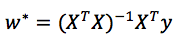

In [6]:
Image(filename='closed_form_soln.png')

In [7]:
def find_predictions(data_matrix, params_vector):
    """
    Gives a Nx1 vector where each entry is the predicted
    value for y, which is calculated using the parameters vector
    obtained from the find_params_vector() method and a row/example
    from the data matrix.
    
    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points
        params_vector - vector containing the values for the parameters that
                        minimize the error function (i.e. solution obtained for w*)
                        from the find_params_vector() method
    """
    return np.array([row.dot(params_vector) for row in data_matrix])

In [8]:
def find_mse(data_matrix, params_vector, y_values):
    """
    Steps for finding the Mean Square Error - 
    1. Get the prediction values for the input
        data points based on the model found.
    2. Calculate the error vector by differencing
        the vector containing target values and 
        the vector containing the predicted values.
    3. Take the square of the errors found and sum them 
        by taking dot product of the error vector with itself.
    4. Calculate the MSE by dividing the sum of the
        squares of errors with the number of input data points.
        
    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points
        params_vector - vector containing the values for the parameters that
                        minimize the error function (i.e. solution obtained for w*)
                        from the find_params_vector() method
        y_values - list of output data points from given dataset
    """
    y_predictions = find_predictions(data_matrix, params_vector)
    error = y_values - y_predictions
    error_square = error.dot(error)
    mse = error_square/len(y_values)
    return mse

In [ ]:
# def fit_model_find_mse(csv_path, degree):
#     df = make_df(csv_path)
#     x_values = df['x']
#     y_values = df['y']
#     X_matrix = make_data_matrix(x_values, degree)
#     params_vector = find_params_vector(X_matrix, y_values)
#     mse = find_mse(X_matrix, params_vector, y_values)
#     return mse

In [9]:
train_df = make_df('./Datasets/Dataset_1_train.csv')

In [10]:
train_x = train_df['x']
train_y = train_df['y']

In [11]:
train_matrix = make_data_matrix(train_x, 20)

In [12]:
params_vector = find_params_vector(train_matrix, train_y)

In [13]:
train_mse = find_mse(train_matrix, params_vector, train_y)

In [14]:
valid_df = make_df('./Datasets/Dataset_1_valid.csv')

In [15]:
valid_x = valid_df['x']
valid_y = valid_df['y']

In [16]:
valid_matrix = make_data_matrix(valid_x, 20)

In [17]:
valid_mse = find_mse(valid_matrix, params_vector, valid_y)

In [18]:
print(train_mse)

6.474766080931443


In [19]:
print(valid_mse)

1419.5725161143287


In [20]:
# since input data points range between (-1, 1),
# generate 50 data points at equal intervals so
# that we can make predictions for them and check
# the fit of the model against the given datasets
x_values_for_plot = np.arange(-1, 1, 0.04)

In [21]:
plot_matrix = make_data_matrix(x_values_for_plot, 20)

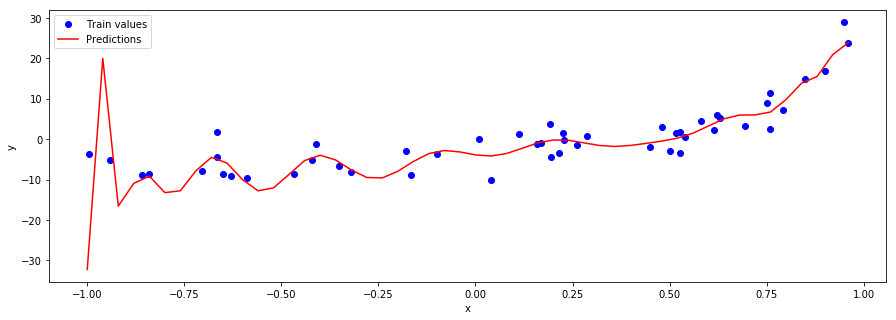

In [22]:
# plotting the output data points from the training data
# set versus the model found from the closed-form solution
plt.plot(train_x, train_y, 'bo', label='Train values')
plt.plot(x_values_for_plot, find_predictions(plot_matrix, params_vector), 'r', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

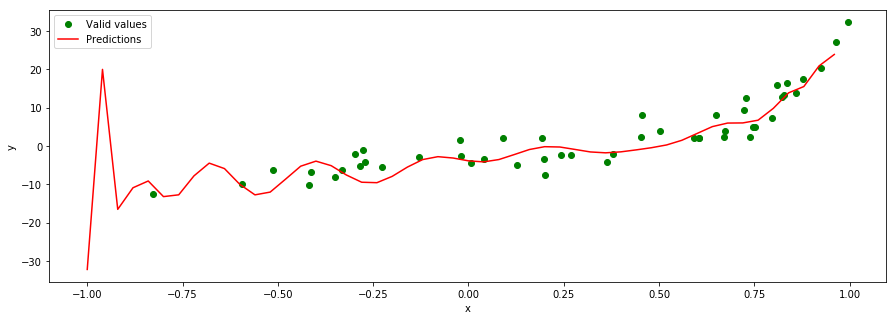

In [23]:
# plotting the output data points from the validation data
# set versus the model found from the closed-form solution
plt.plot(valid_x, valid_y, 'go', label='Valid values')
plt.plot(x_values_for_plot, find_predictions(plot_matrix, params_vector), 'r', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()